In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

import CFDnet_plus

ModuleNotFoundError: No module named 'CFDnet_plus'

In [ ]:
modelfolder='cfdnetplus_models/model2/'
mainfolder='airfoil2d/airFoil_500/'
data=np.load(mainfolder+'input.npy')
normal=np.load(modelfolder+'normal.npy')
fields= ['U','p','k','omega', 'nut']

xlim =[-50,50]
ylim = [-20 , 20]



In [84]:
print(normal)

[[[[4.41323047e+03 4.41323047e+03 4.41323047e+03 7.32776720e+07
    2.83279031e+05 1.93653164e+04 4.86423264e+01]]]]


In [85]:
model = tf.keras.models.load_model(modelfolder)

In [86]:
prediction=model.predict(data*1/normal)

1/1 [==============================] - 0s 121ms/step


In [87]:
prediction=prediction*normal


In [90]:
np.save(mainfolder+'pred',prediction)

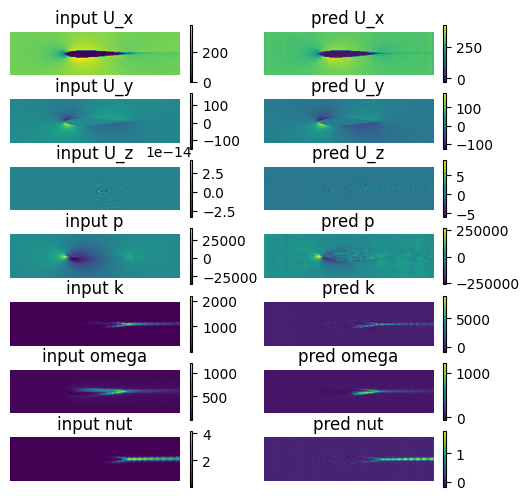

In [89]:
#print(test_data.shape)
n=0
fig = plt.figure(figsize=(6, 6))
[a,b,c,d]=data.shape
titles= ['U_x','U_y','U_z','p','k','omega', 'nut']

for i in range(d):
    fig.add_subplot(d, 2, i*2+1)
    plt.imshow(data[n,:,:,i])
    plt.title('input ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, 2, i*2+2)
    plt.imshow(prediction[n,:,:,i])
    plt.title('pred '+titles[i])
    plt.axis('off')
    plt.colorbar()
    #print(i)

plt.show()

In [94]:
CFDnet_plus.pred2OF2D(mainfolder,fields,xlim, ylim)

folder airfoil2d/airFoil_500//41 was created
write airfoil2d/airFoil_500//41/U
write airfoil2d/airFoil_500//41/p
write airfoil2d/airFoil_500//41/k
write airfoil2d/airFoil_500//41/omega
write airfoil2d/airFoil_500//41/nut


In [101]:
print(np.amax(prediction[:,:,:,2]))

8.95670762003374
